<a href="https://colab.research.google.com/github/ganesh-shet/Open-contributions/blob/master/Ganesh_G_Shet_Brain_tumor__classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

**One Hot Encoding the Target Classes**

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 
 
# 0 - Tumor
# 1 - Normal

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

**Creating 3 Important Lists --**

data list for storing image data in numpy array form

paths list for storing paths of all images

result list for storing one hot encoded form of target class whether normal or tumor

In [ ]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"/content/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)

**Splitting the Data into Training & Testing**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

**Model Building**

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))    #filter = 32
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())    #to convert it into 1D array

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [ ]:
x_train.shape,y_train.shape

((111, 128, 128, 3), (111, 2))

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 23s 2s/step - loss: 24.8065 - val_loss: 122.1450
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 30.8271 - val_loss: 6.1901
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 6.2034 - val_loss: 20.0883
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 5.8615 - val_loss: 9.9306
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 3.5619 - val_loss: 7.8809
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 2.4879 - val_loss: 5.5015
Epoch 7/30
3/3 [==============================] - 5s 1s/step - loss: 3.3705 - val_loss: 8.0041
Epoch 8/30
3/3 [==============================] - 4s 1s/step - loss: 1.4793 - val_loss: 11.7809
Epoch 9/30
3/3 [==============================] - 5s 1s/step - loss: 0.6725 - val_loss: 10.3848
Epoch 10/30
3/3 [==============================] - 5s 2s/step - loss: 0.5452 - val_loss: 6.1997
Epoch 11/30
3/3 [========================

**Plotting Losses**

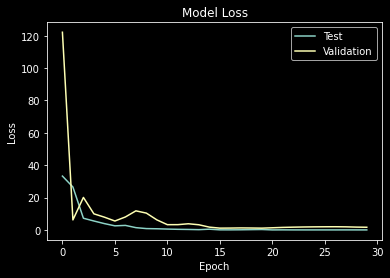

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

**Just Checking the Model**

In [ ]:
def names(number):
    if number==0:
        return ' **A Tumor**'
    else:
        return '**Not a tumor**'

100.0% Confidence This Is **Not a tumor**


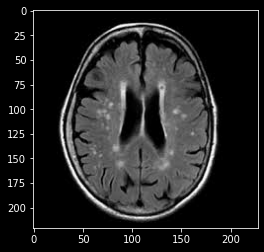

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/no/18 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.98278617858887% Confidence This Is  **A Tumor**


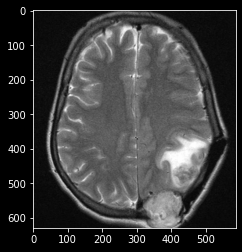

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/yes/Y102.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

**THANK YOU**